# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime as dt
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = city_weather_json["name"] 
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
            
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | panaba
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | kishanpur
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | burang
Processing Record 15 of Set 1 | maceio
Processing Record 16 of Set 1 | atkaracalar
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | acapulco de juarez
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | lebu
Proces

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waitangi,-43.9535,-176.5597,8.79,54,17,9.02,NZ,1683834213
1,Panabá,21.2833,-88.2667,38.08,27,29,8.25,MX,1683834214
2,Puerto Ayora,-0.7393,-90.3518,29.98,92,91,3.58,EC,1683834214
3,Kishanpur,25.6500,81.0167,29.93,12,0,2.53,IN,1683834214
4,Codrington,-38.2667,141.9667,11.35,92,100,2.24,AU,1683834214


In [22]:
# converting timestamp to date format and assigning value to chart title 

# Converting non-numerical values to datetime format
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"])

# Extracting the date part
city_data_df["Date"] = city_data_df["Date"].dt.date

# Extracting the first date value for the chart title
title_date = city_data_df["Date"].iloc[0].strftime("%Y-%m-%d")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waitangi,-43.9535,-176.5597,8.79,54,17,9.02,NZ,2023-05-11
1,Panabá,21.2833,-88.2667,38.08,27,29,8.25,MX,2023-05-11
2,Puerto Ayora,-0.7393,-90.3518,29.98,92,91,3.58,EC,2023-05-11
3,Kishanpur,25.6500,81.0167,29.93,12,0,2.53,IN,2023-05-11
4,Codrington,-38.2667,141.9667,11.35,92,100,2.24,AU,2023-05-11


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Waitangi,-43.9535,-176.5597,8.79,54,17,9.02,NZ,2023-05-11
1,Panabá,21.2833,-88.2667,38.08,27,29,8.25,MX,2023-05-11
2,Puerto Ayora,-0.7393,-90.3518,29.98,92,91,3.58,EC,2023-05-11
3,Kishanpur,25.6500,81.0167,29.93,12,0,2.53,IN,2023-05-11
4,Codrington,-38.2667,141.9667,11.35,92,100,2.24,AU,2023-05-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

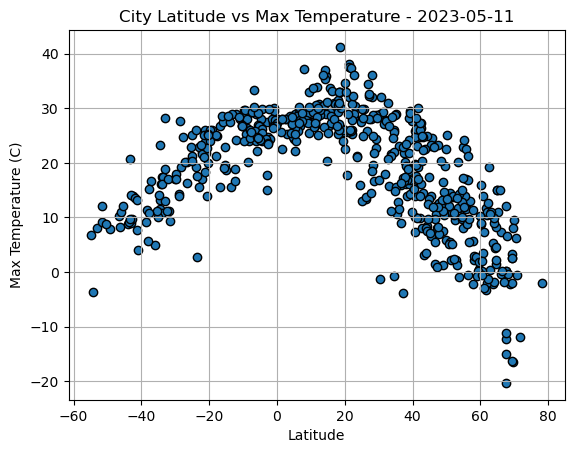

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title(f"City Latitude vs Max Temperature - {title_date}")

# Save the figure
plt.savefig("WPYFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

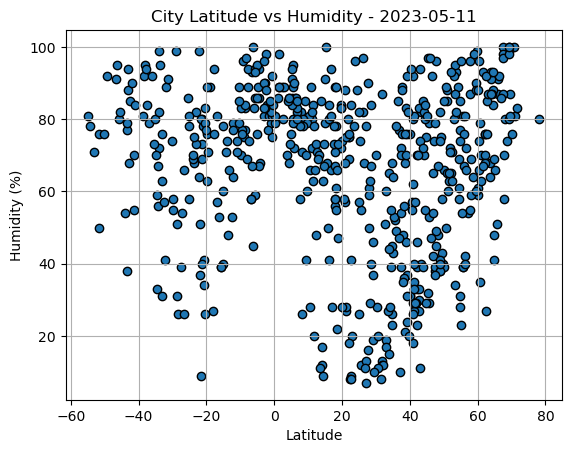

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f"City Latitude vs Humidity - {title_date}")

# Save the figure
plt.savefig("WPYFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

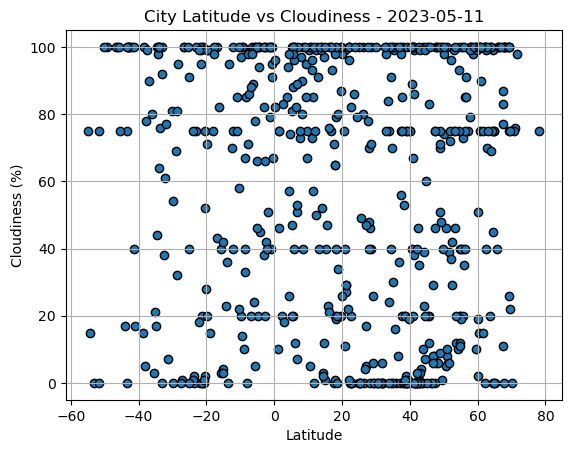

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f"City Latitude vs Cloudiness - {title_date}")

# Save the figure
plt.savefig("WPYFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

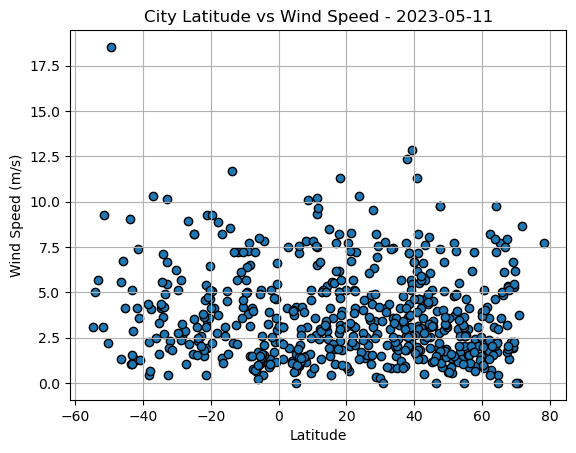

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title(f"City Latitude vs Wind Speed - {title_date}")

# Save the figure
plt.savefig("WPYFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel (x_values.name)
    plt.ylabel (y_values.name)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data

northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Panabá,21.2833,-88.2667,38.08,27,29,8.25,MX,2023-05-11
3,Kishanpur,25.6500,81.0167,29.93,12,0,2.53,IN,2023-05-11
5,Gadzhiyevo,69.2551,33.3362,2.58,100,100,1.94,RU,2023-05-11
8,Badger,64.8000,-147.5333,15.00,41,75,0.45,US,2023-05-11
10,College,64.8569,-147.8028,15.05,48,75,0.00,US,2023-05-11


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data

southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Waitangi,-43.9535,-176.5597,8.79,54,17,9.02,NZ,2023-05-11
2,Puerto Ayora,-0.7393,-90.3518,29.98,92,91,3.58,EC,2023-05-11
4,Codrington,-38.2667,141.9667,11.35,92,100,2.24,AU,2023-05-11
6,Punta Arenas,-53.1500,-70.9167,8.06,71,0,5.66,CL,2023-05-11
7,Edinburgh of the Seven Seas,-37.0676,-12.3116,16.74,79,90,10.31,SH,2023-05-11


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6253603841683878


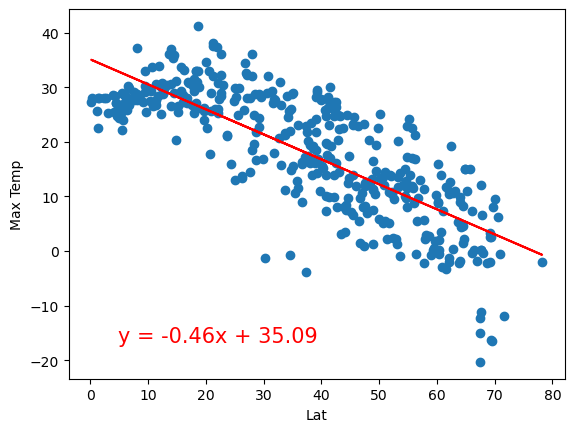

In [34]:
# Linear regression on Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-squared is: 0.6597917039307618


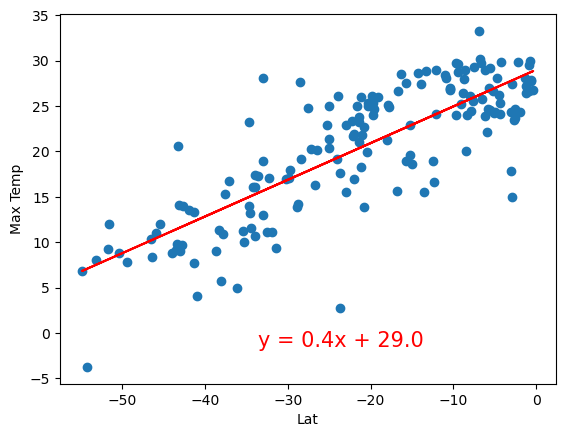

In [37]:
# Linear regression on Southern Hemisphere

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004868359901532046


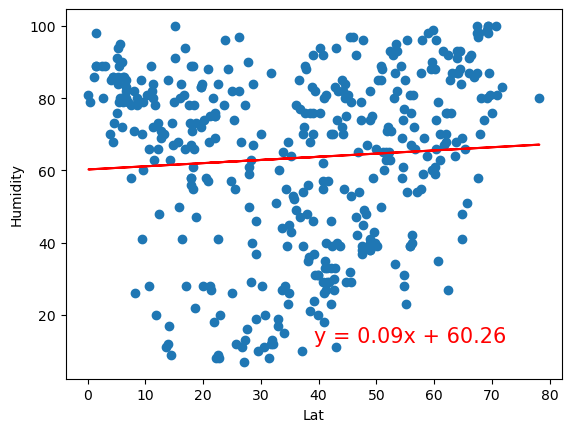

In [39]:
# Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

linear_regression(x_values, y_values, 0.5, 0.1)

The r-squared is: 0.015809979530023107


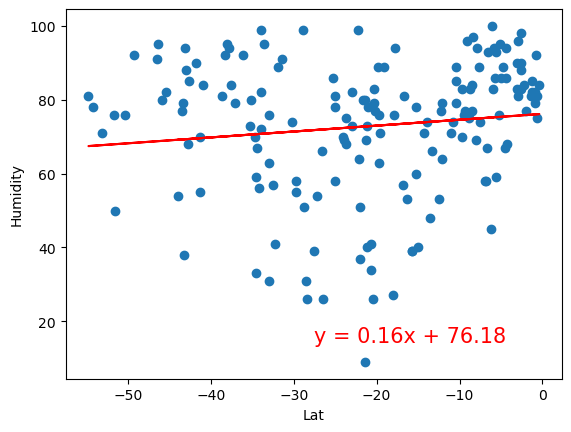

In [40]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 1.7196950530163198e-08


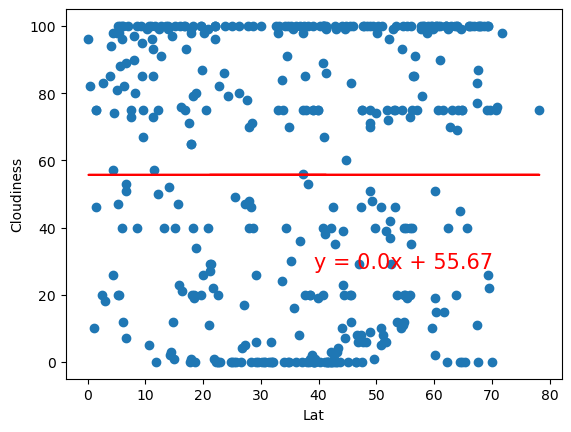

In [41]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]

linear_regression(x_values, y_values, 0.5, 0.3)

The r-squared is: 0.0017504417664846198


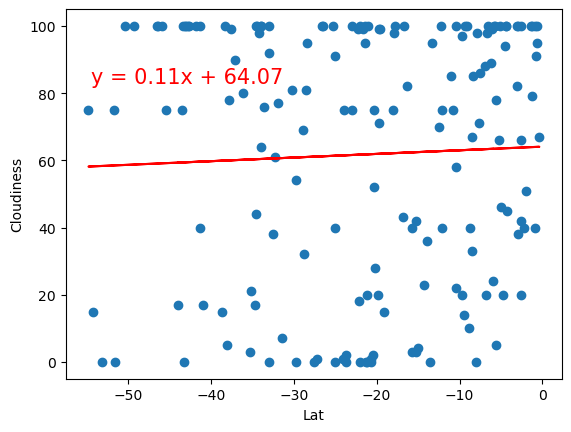

In [42]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0022348335068649292


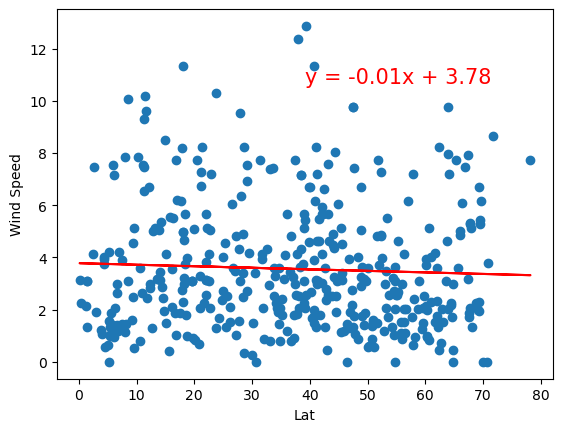

In [44]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

The r-squared is: 0.020099062625819196


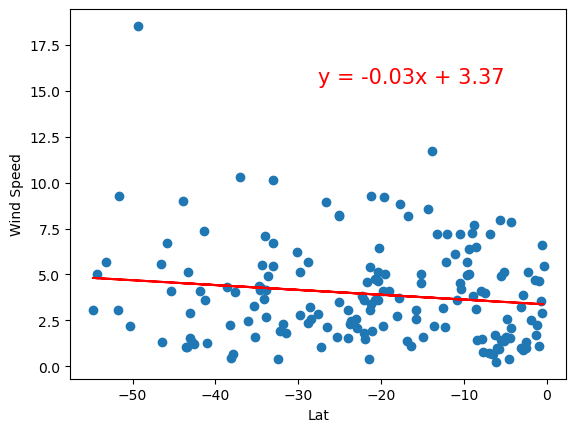

In [46]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE